In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,log_loss

step1: Generate the data that is lineraly not seprabable
step2: Train with sigmoid neuron and see performance
step3: Write FeedForwardNetwork from scratch
step4: Train the FeedForwardNetwork and compare with Sigmoid Neuron
step5: Write a generic class for FeedForwardNetwork
step6: Train generic class fir binary ckassification
step7: Train fir a Multi-Class Classification
step8: Train FeedForewardNetwork for identifying 5
step9: Use Softmax as activation function for output layer
step10: Train with 8 for output multi class
step11: try other dataset

In [3]:
data,labels=make_blobs(n_samples=1000,centers=4,n_features=2,random_state=0)

In [4]:
class SigmoidNeuron:

   def __init__(self):
      self.w=None
      self.b=None

   def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b

   def sigmoid(self,x):
    return 1/(1+np.exp(-x))

   def grad_w_mse(self,x,y):
     y_pred=self.sigmoid(self.perceptron(x))
     return (y_pred-y)*y_pred*(1-y_pred)*x

   def grad_b_mse(self,x,y):
     y_pred=self.sigmoid(self.perceptron(x))
     return (y_pred-y)*y_pred*(1-y_pred)

   def grad_w_ce(self,x,y):
     y_pred=self.sigmoid(self.perceptron(x))
     if y==0:
      return y_pred*x
     elif y==1:
      return (1-y_pred)*x
     else:
      raise ValueError("y should be 0 or 1")

   def grad_b_ce(self,x,y):
     y_pred=self.sigmoid(self.perceptron(x))
     y_pred=self.sigmoid(self.perceptron(x))
     if y==0:
      return y_pred*x
     elif y==1:
       return (1-y_pred)*x
     else:
       raise ValueError("y should be 0 or 1")

   def fit(self,X,Y,epochs=1,learning_rate=1,intialize=True,loss_fn='mse',display_loss=False):

        if intialize:
         np.random.seed(0)
         self.w=np.random.randn(1,X.shape[1])
         self.b=0

        if display_loss:
          loss={}

        for i in range(epochs):
          dw=0
          db=0
          for x,y in zip(X,Y):
            if loss_fn=='mse':
              dw+=self.grad_w_mse(x,y)
              db+=self.grad_b_mse(x,y)
            else:
              dw+=self.grad_w_ce(x,y)
              db+=self.grad_b_ce(x,y)

          m=X.shape[1]
          self.w -=learning_rate*dw/m
          self.b -=learning_rate*db/m

          if display_loss:
            Y_pred=self.sigmoid(self.perceptron(X))
            if loss_fn=='mse':
              loss[i]=mean_squared_error(Y,Y_pred)
            else:
              loss[i]=log_loss(Y,Y_pred)


        if display_loss:
          plt.plot(np.array(list(loss.values())))
          plt.xlabel("Epochs")
          if loss_fn=='mse':
            plt.ylabel("mean square error")
          else:
            plt.ylabel("cross entropy error")
          plt.grid()
          plt.show()

   def predict(self,X):
      Y_pred=[]
      for x in X:
        y_pred=self.sigmoid(self.perceptron(x))
        Y_pred.append(y_pred)
      return np.array(Y_pred)


In [5]:
data.shape

(1000, 2)

In [6]:
labels.shape

(1000,)

<Axes: >

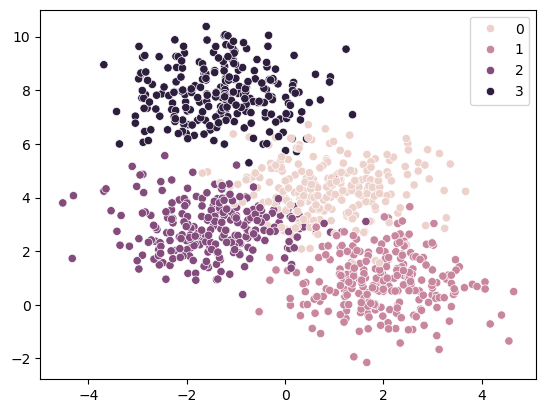

In [7]:
sns.scatterplot(x=data[:,0],y=data[:,1],hue=labels)

In [8]:
labels_orginal=labels
labels=np.mod(labels_orginal,2)

<Axes: >

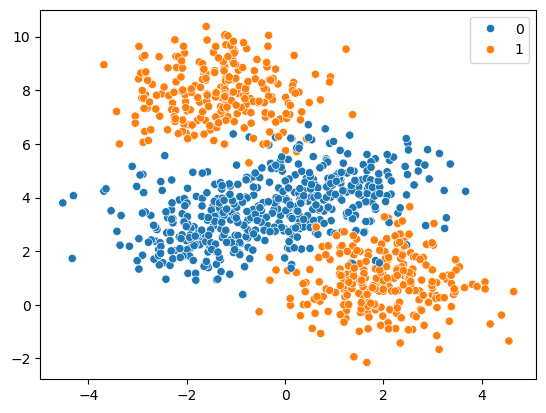

In [9]:
sns.scatterplot(x=data[:,0],y=data[:,1],hue=labels)

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(data,labels,stratify=labels,random_state=0)

In [11]:
X_train.shape

(750, 2)

In [12]:
X_test.shape

(250, 2)

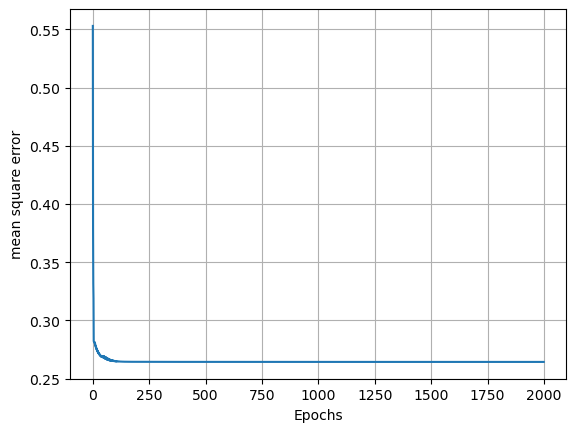

In [13]:
sn = SigmoidNeuron()
sn.fit(X_train,Y_train,epochs=2000,learning_rate=0.25,intialize=True,display_loss=True)

In [14]:
Y_train.shape

(750,)

In [15]:
Y_test.shape

(250,)

In [16]:
Y_pred_train = sn.predict(X_train)

In [17]:

Y_pred_binarized = (Y_pred_train >= 0.5).astype(int).ravel()
Y_pred_test = sn.predict(X_test)
Y_pred_binarized_test = (Y_pred_test >= 0.5).astype(int).ravel()
accuracy_train = accuracy_score(Y_train,Y_pred_binarized)
accuracy_test = accuracy_score(Y_test,Y_pred_binarized_test)

In [18]:
accuracy_train

0.7346666666666667

In [19]:
accuracy_test

0.716

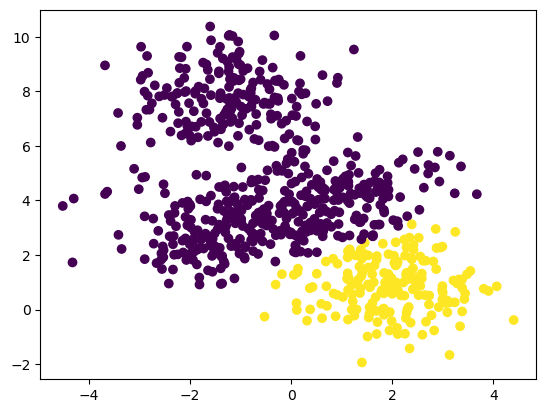

In [20]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_pred_binarized)

In [21]:
class FeedForwardNetwork:
    
    def __init__(self):
        
        self.w1=np.random.rand()
        self.w2=np.random.rand()
        self.w3=np.random.rand()
        self.w4=np.random.rand()
        self.w5=np.random.rand()
        self.w6=np.random.rand()
        self.b1=0
        self.b2=0
        self.b3=0

    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-x))

    def forward_pass(self,x):
        self.x1,self.x2=x
        self.a1=self.x1*self.w1+self.x2*self.w2+self.b1
        self.h1=self.sigmoid(self.a1)
        self.a2=self.x1*self.w3+self.x2*self.w4+self.b2
        self.h2=self.sigmoid(self.a2)
        self.a3=self.h1*self.w5+self.h2*self.w6+self.b3
        self.h3=self.sigmoid(self.a3)
        return self.h3
        
    def grad(self, x, y):
    	self.forward_pass(x)
    
    	self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
    	self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
    	self.db3 = (self.h3-y) * self.h3*(1-self.h3)
    
    	self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    	self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
    	self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)
 
    	self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
    	self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
    	self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)



    def fit(self,X,Y,epochs=1,learning_rate=1,initialize=True,loss_fn='mse',display_loss=False):
        
        if initialize:
        
            self.w1 = np.random.randn()
            self.w2 = np.random.randn()
            self.w3 = np.random.randn()
            self.w4 = np.random.randn()
            self.w5 = np.random.randn()
            self.w6 = np.random.randn()
            self.b1 = 0
            self.b2 = 0
            self.b3 = 0
        
        if display_loss:
            loss={}

        for i in range(epochs):
    
            dw1=0
            dw2=0
            dw3=0
            dw4=0
            dw5=0
            dw6=0
            db1=0
            db2=0
            db3=0
               
            for x,y in zip(X,Y):
                self.grad(x,y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3
            
            m=X.shape[1]
            self.w1 -=learning_rate*dw1/m
            self.w2 -=learning_rate*dw2/m
            self.w3 -=learning_rate*dw3/m
            self.w4 -=learning_rate*dw4/m
            self.w5 -=learning_rate*dw5/m
            self.w6 -=learning_rate*dw6/m
        
            self.b1 -=learning_rate*db1/m
            self.b2 -=learning_rate*db3/m
            self.b3 -=learning_rate*db3/m

            if display_loss:
                
                Y_pred=self.predict(X) 
                loss[i]=mean_squared_error(Y,Y_pred)
            

        
        if display_loss:
          plt.plot(np.array(list(loss.values())).astype(float))
          plt.xlabel("Epochs")
          
          plt.ylabel("mean square error")
          
          plt.ylabel("cross entropy error")
          plt.grid()
          plt.show()

    def predict(self,X):
        Y_pred=[]
        for x in X:
            y_pred=self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred)

      

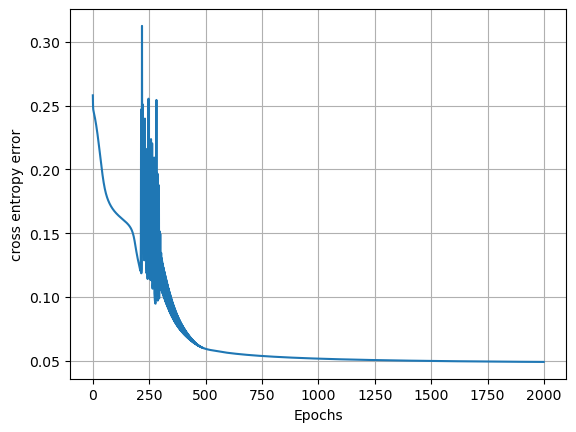

In [22]:
ffn = FeedForwardNetwork()
ffn.fit(X_train,Y_train,epochs=2000,learning_rate=0.01,initialize=True,display_loss=True)

In [23]:
Y_pred_train = ffn.predict(X_train)

In [24]:

Y_pred_binarized = (Y_pred_train >= 0.5).astype(int).ravel()
Y_pred_test = ffn.predict(X_test)
Y_pred_binarized_test = (Y_pred_test >= 0.5).astype(int).ravel()
accuracy_train = accuracy_score(Y_train,Y_pred_binarized)
accuracy_test = accuracy_score(Y_test,Y_pred_binarized_test)

In [25]:
accuracy_train

0.9426666666666667

In [26]:
accuracy_test

0.936

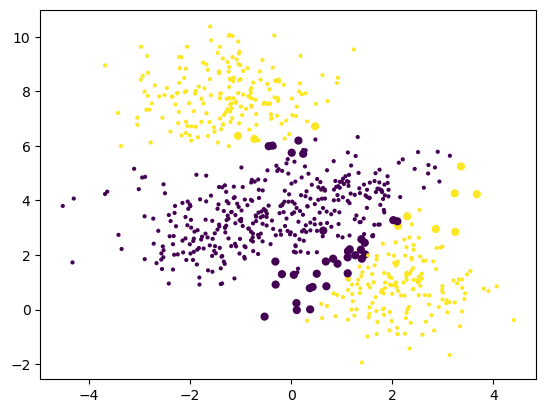

In [27]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_pred_binarized,s=20*(np.abs(Y_pred_binarized-Y_train)+0.2))